In [1]:
import dash
import dash_core_components as dcc
import dash_html_components as html

import plotly.graph_objects as go

import numpy as np
import datetime as dt
import pandas as pd

from pathlib import Path

import matplotlib.pyplot as plt
%matplotlib inline

# AGE MATTERS!

1.  IFR => maarten maakt deze tabel => mogelijk om met IFR ook het aantal geinfecteerden terug te rekenen => goed voor eventueel model
2. excess deaths
3. vergelijken tussen landen
4. SIR model?
5. plot the exponential growth chart met verschillende leeftijden

## 2. Excess Deaths for different age categories and cumulations

*  Mortality rate is typically expressed in units of deaths per 1,000 individuals per year; thus, a mortality rate of 9.5 (out of 1,000) in a population of 1,000 would mean 9.5 deaths per year in that entire population,

In [20]:
path = Path('data/mortality_org.csv')
df = pd.read_csv(path, skiprows=1)

In [21]:
all_countries = df['CountryCode'].value_counts().keys().values
all_inhab = [5.532, 17.060, 46.737, 11.539, 5.379, 8.955, 5.772, 67.530, 10.036, 329.065, 10.226, 83.517, 0.339]

In [22]:
df.columns

Index(['CountryCode', 'Year', 'Week', 'Sex', 'D0_14', 'D15_64', 'D65_74',
       'D75_84', 'D85p', 'DTotal', 'R0_14', 'R15_64', 'R65_74', 'R75_84',
       'R85p', 'RTotal', 'Split', 'SplitSex', 'Forecast'],
      dtype='object')

In [73]:
interesting_cols = ['CountryCode', 'Year', 'Week', 'D0_14', 'D15_64', 'D65_74',
       'D75_84', 'D85p', 'DTotal']
                    
#"R0_14", "R15_64", "R65_74", "R75_84", "R85p", "RTotal"]


def generate_mortality_df(country, df):

    mask_gender_all = df['Sex'] == 'b'
    mask_country = df['CountryCode'] == country
    df_country = pd.DataFrame(df[mask_country & mask_gender_all][interesting_cols])
    
    return df_country

df_be = generate_mortality_df('BEL', df)
df_be.head(n=5)

CountryCode  Year  Week  D0_14  D15_64  D65_74  D75_84   D85p  DTotal
3164         BEL  2000     1   18.0   442.0   540.0   881.0  933.0  2814.0
3167         BEL  2000     2   20.0   426.0   494.0   870.0  951.0  2761.0
3170         BEL  2000     3   22.0   391.0   509.0   788.0  930.0  2640.0
3173         BEL  2000     4   20.0   432.0   482.0   793.0  906.0  2633.0
3176         BEL  2000     5   12.0   413.0   428.0   735.0  815.0  2403.0

In [74]:
df_be['kids'] = df_be['D0_14']
df_be['minus65'] = df_be['D0_14'] + df_be['D15_64'] 
df_be['minus75'] = df_be['minus65'] + df_be['D65_74']  
df_be['minus85'] = df_be['minus75'] + df_be['D75_84'] 
df_be['all'] = df_be['DTotal']  


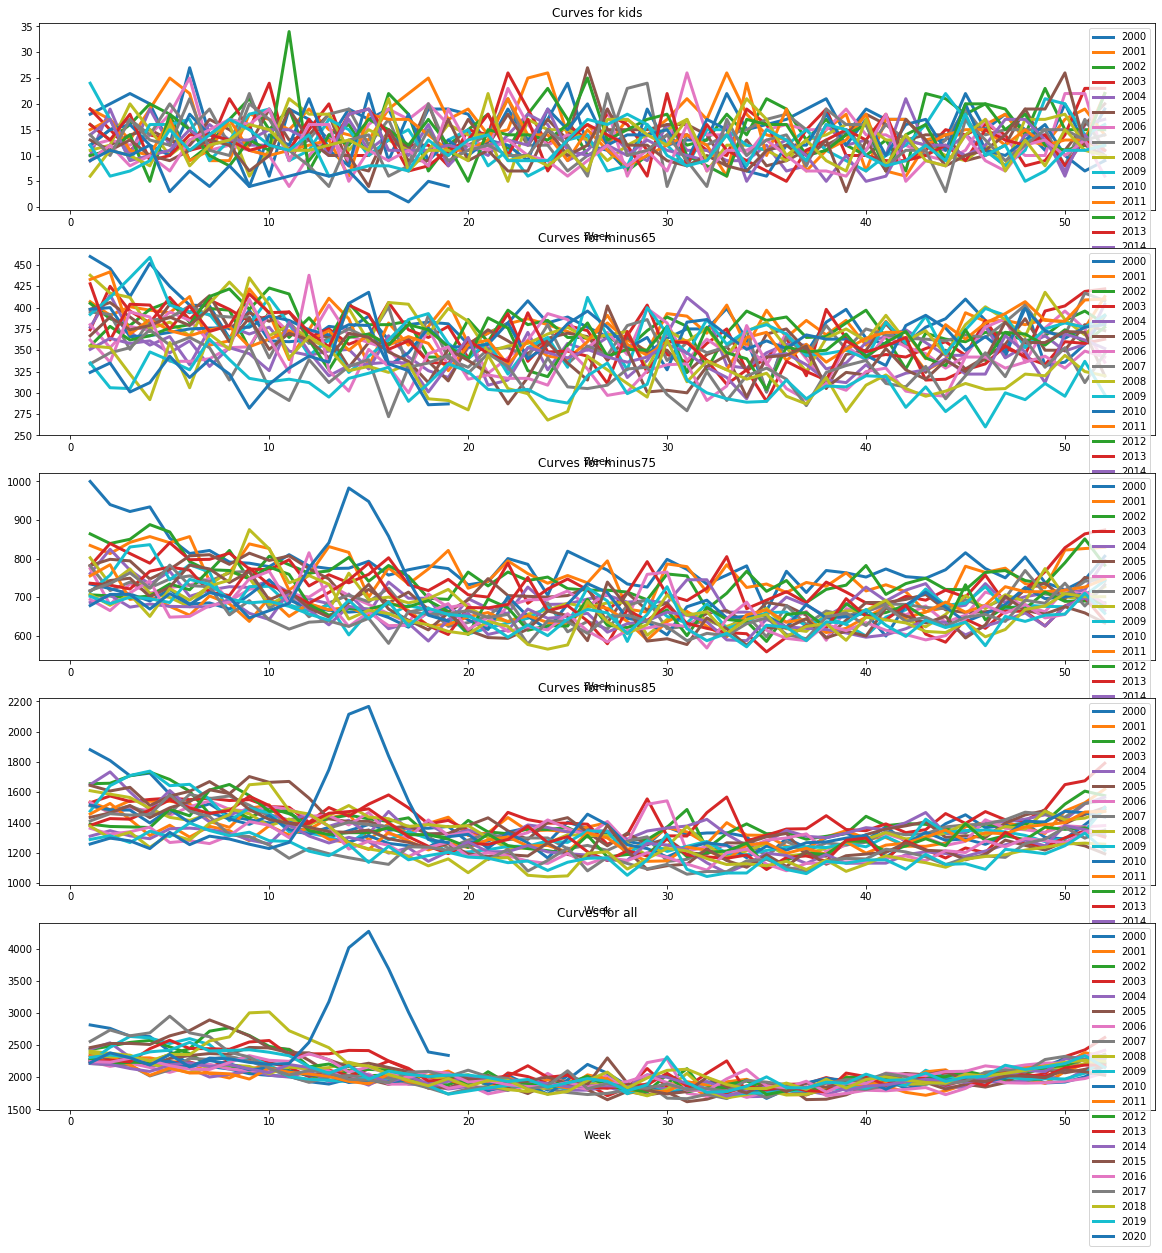

In [75]:
year_min = df_be['Year'].min()
year_max = df_be['Year'].max()
interesting_segments = ['kids', 'minus65', 'minus75', 'minus85', 'all']
num_seg = len(interesting_segments)


fig, ax = plt.subplots( num_seg, 1, figsize=(20,4*num_seg))

for i, seg in enumerate(interesting_segments):
    for year in range(year_min, year_max+1):
    
        new_colname = str(year)
        df_bel = df_be.rename(columns={seg: new_colname})
        
        year_mask = df_bel['Year'] == year
    
        df_bel[year_mask].plot(x='Week', y=new_colname, ax=ax[i], linewidth=3, legend=1)
    
    ax[i].set_title('Curves for ' + str(seg))
    ax[i].legend(loc='upper right')


In [97]:
death_cols.append('test')


In [101]:
df

['D0_14', 'D15_64', 'D65_74', 'D75_84', 'D85p', 'test', 'test2']

# stack bar chart is misschien ook nog wel interessant!

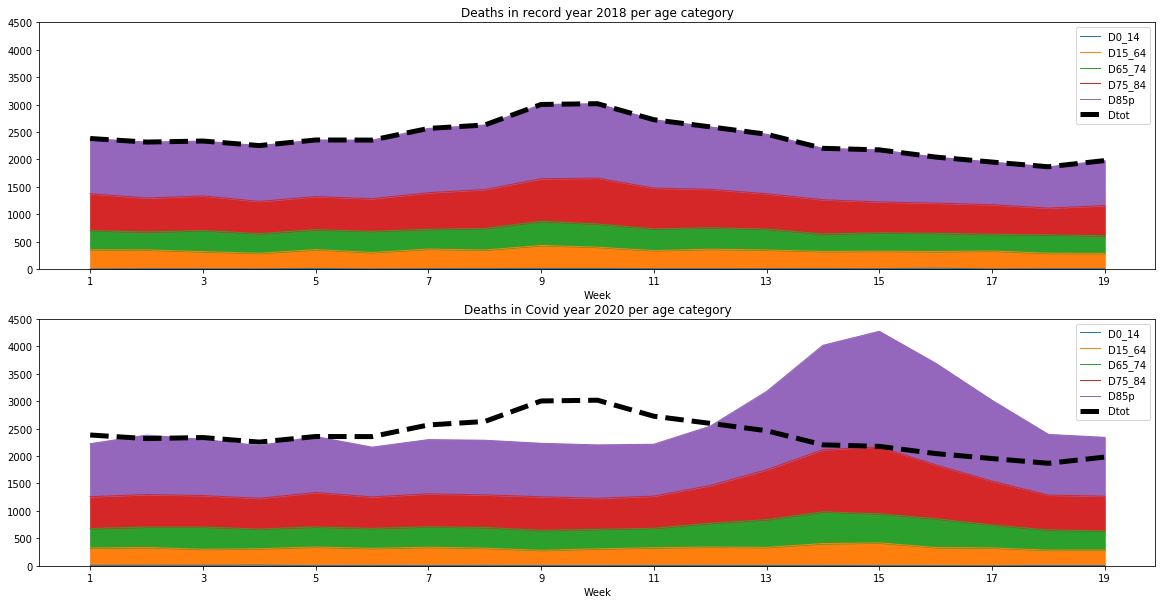

In [189]:
fig, ax = plt.subplots(2,1, figsize=(20,10), sharex=False)

death_cols = ['D0_14', 'D15_64', 'D65_74', 'D75_84', 'D85p']
all_cols = ['Week'] + death_cols 

yl = [0,4500]
year = 2018
max_week = 19
mask_year  = df_be['Year'] == year
mask_week  = df_be['Week'] <= max_week
m1 = mask_week & mask_year

df_be[m1].plot(kind='area', ax=ax[0], ylim=yl, y=death_cols, x='Week', grid=True, linewidth=1);

year = 2020
mask_year  = df_be['Year'] == year
m2 = mask_week & mask_year

df_be[m2].plot(kind='area', ax=ax[1], ylim=yl, y=death_cols, x='Week', grid=True, linewidth=1);



df_be[m1].plot(kind='line', ax=ax[1], ylim=yl, y="DTotal", x='Week', linewidth=5, style='--', color='k');
df_be[m1].plot(kind='line', ax=ax[0], ylim=yl, y="DTotal", x='Week', linewidth=5, style='--', color='k');



ax[0].set_title('Deaths in record year 2018 per age category')
ax[1].set_title('Deaths in Covid year 2020 per age category')


ax[0].set_xticks(np.arange(1,20,2))
ax[1].set_xticks(np.arange(1,20,2));

ax[0].legend(death_cols + ['Dtot'])
ax[1].legend(death_cols + ['Dtot'])

## but how big are these peaks really, we should cumulate the results!

In [140]:
df18 = pd.DataFrame(df_be[m1])
df20 = pd.DataFrame(df_be[m2])

In [151]:
Dcols = ['D0_14', 'D15_64', 'D65_74', 'D75_84', 'D85p', 'DTotal']

for d in Dcols:
    new_colname = 'C' + d[1:]
    
    df18[new_colname] = df18[d].cumsum()
    df20[new_colname] = df20[d].cumsum()

    
df18.head(n=3)

CountryCode  Year  Week  D0_14  D15_64  D65_74  D75_84    D85p  DTotal  \
5972         BEL  2018     1    6.0   349.0   352.0   670.0  1005.0  2382.0   
5975         BEL  2018     2   11.0   342.0   326.0   619.0  1019.0  2317.0   
5978         BEL  2018     3   10.0   312.0   385.0   630.0   999.0  2336.0   

      kids  minus65  minus75  minus85     all  C0_14  C15_64  C65_74  C75_84  \
5972   6.0    355.0    707.0   1377.0  2382.0    6.0   349.0   352.0   670.0   
5975  11.0    353.0    679.0   1298.0  2317.0   17.0   691.0   678.0  1289.0   
5978  10.0    322.0    707.0   1337.0  2336.0   27.0  1003.0  1063.0  1919.0   

        C85p  CTotal  
5972  1005.0  2382.0  
5975  2024.0  4699.0  
5978  3023.0  7035.0

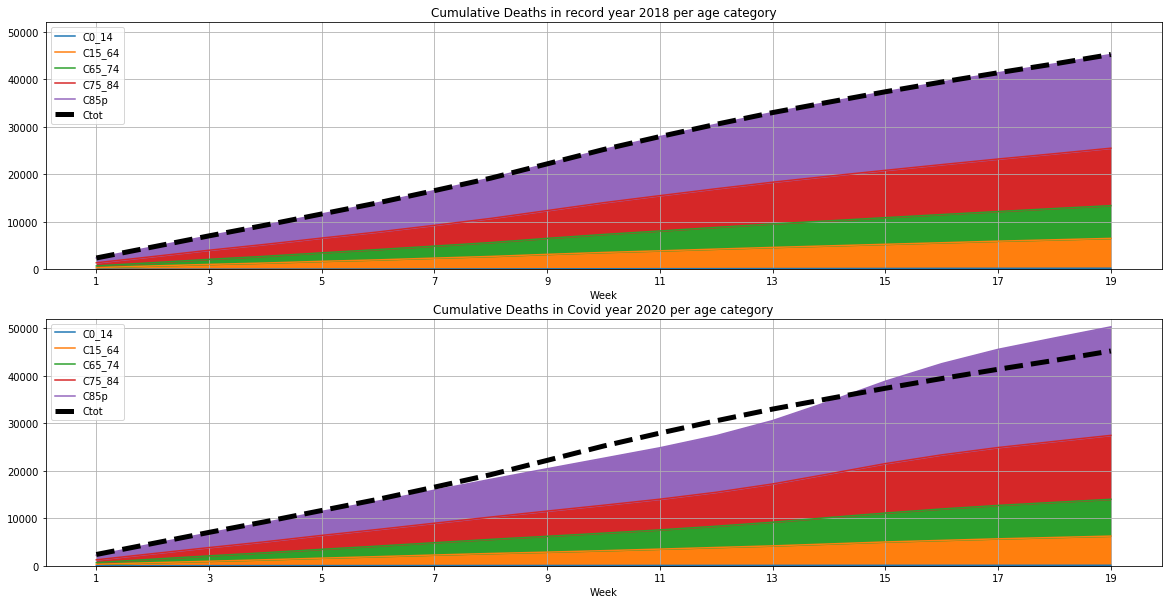

In [193]:
fig, ax = plt.subplots(2,1, figsize=(20,10), sharex=False)

death_cols = ['C0_14', 'C15_64', 'C65_74', 'C75_84', 'C85p']
all_cols = ['Week'] + death_cols 

yl = [0,52000]


df18.plot(kind='area', ax=ax[0], ylim=yl, y=death_cols, x='Week', grid=True);
df18.plot(kind='line', ax=ax[0], ylim=yl, y="CTotal", x='Week', linewidth=5, style='--', color='k', grid='on');

df20.plot(kind='area', ax=ax[1], ylim=yl, y=death_cols, x='Week', grid=True);
df18.plot(kind='line', ax=ax[1], ylim=yl, y="CTotal", x='Week', linewidth=5, style='--', color='k', grid='on');

ax[0].set_title('Cumulative Deaths in record year 2018 per age category')
ax[1].set_title('Cumulative Deaths in Covid year 2020 per age category')

ax[0].set_xticks(np.arange(1,20,2))
ax[1].set_xticks(np.arange(1,20,2));

ax[0].legend(death_cols + ['Ctot'])
ax[1].legend(death_cols + ['Ctot'])


## it's hard to see the difference, what if we remove the area of the charts which occur every year?

In [208]:
def generate_excess_per_age(country, df):

    ####
    Dcols = ['D0_14', 'D15_64', 'D65_74', 'D75_84', 'D85p', 'DTotal']
    mask_gender_all = df['Sex'] == 'b'
    mask_country = df['CountryCode'] == country
    cols = ['CountryCode', 'Year', 'Week'] + Dcols
    df_country = pd.DataFrame(df[mask_country & mask_gender_all][cols])


    #calculate avg death
    
    agg_dict = {
        'DTotal': np.median
    }
    
    rename_dict = {
        'DTotal': 'avg_death'
    }
    

    df_gr = df_country.groupby('Week').aggregate(agg_dict).rename(columns=rename_dict)


    
    df_country_joined = (
        df_country
            .set_index('Week')
            .join(df_gr)
    )

    df_country_joined['excess_mortality'] = df_country_joined['DTotal'] - df_country_joined['avg_death']
    
    return df_country_joined
    

    #mask = df_country_joined['Year'] == 2020
    #df_now = pd.DataFrame(
    #    df_country_joined[mask])

    #return df_now[['excess_mortality_mil']].rename(columns={'excess_mortality_mil': country+'_exmomi'})


In [210]:
df_be_ex = generate_excess_per_age("BEL", df)
df_be_ex.head(n=3)

CountryCode  Year  D0_14  D15_64  D65_74  D75_84   D85p  DTotal  \
Week                                                                   
1            BEL  2000   18.0   442.0   540.0   881.0  933.0  2814.0   
1            BEL  2001   19.0   388.0   427.0   702.0  746.0  2282.0   
1            BEL  2002   16.0   389.0   459.0   793.0  775.0  2432.0   

      avg_death  excess_mortality  
Week                               
1        2286.0             528.0  
1        2286.0              -4.0  
1        2286.0             146.0

In [ ]:
yl = [0,4500]
year = 2018
max_week = 19
mask_year  = df_be['Year'] == year
mask_week  = df_be['Week'] <= max_week
m1 = mask_week & mask_year




In [198]:
all_countries = df['CountryCode'].value_counts().keys().values
all_inhab = [5.532, 17.060, 46.737, 11.539, 5.379, 8.955, 5.772, 67.530, 10.036, 329.065, 10.226, 83.517, 0.339]

generate_excess_df('BEL', df,  11.539)


BEL_exmomi
Week            
1      -5.373083
2       4.939769
3       0.000000
4      -3.726493
5       5.373083
6      -6.759685
7       3.293180
8       3.379842
9      -2.079903
10      2.166566
11      4.766444
12     37.264928
13     95.935523
14    167.778837
15    194.644250
16    142.733339
17     88.222550
18     39.258168
19     32.758471

## so it is safe to say the protagonist for covid was living in a facility for the elder, how about we study the crisis for the people before pension between different countries

## as most people with covid were elderly and since they were in lockdwown it might be worthwile to study the evolution of covid for min65 vs +65, did the pandemic have a different timeline?